P S V N Bhavani Shankar - S20170010105 <br>
Pavan Kumar Anand - S20170020230<br>
Hemanth Sanisetty - S20170010138<br>
Somana Venkata Sai Krishna Rupesh - S20170020241<br>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.gofplots import qqplot
from sklearn import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#DATA Cleaning
Upload the AirQuality.xlsx file before running the code

In [ ]:

data= pd.read_excel('AirQualityUCI.xlsx')
print(data.head())
data['DateTime'] = data['Date'].astype(str)+ ' ' + data['Time'].astype(str)
data.drop(['Time'], axis=1, inplace=True)
data['DateTime'] = pd.to_datetime(data['DateTime'].astype(str), format='%Y-%m-%d %H:%M:%S')
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y-%m-%d')
data['Year'] = data['DateTime'].map(lambda x:x.year)
data['YearMonth'] = pd.to_datetime(data.DateTime).dt.to_period('m')


feature_columns = list(set(list(data.columns)) - set(['Date','YearMonth','DateTime','Year','CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)',]))
other_columns = list(set(['Date','YearMonth','Year','DateTime']))
Targets_colums = list(set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
print(data[other_columns])
print(data[feature_columns])

        Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]
                DateTime       Date YearMonth  Year
0    2004-03-10 18:00:00 2004-03-10   2004-03  2004
1    2004-03-10 19:00:00 2004-03-10   2004-03  2004
2    2004-03-10 20:00:00 2004-03-10   2004-03  2004
3    2004-03-10 21:00:00 2004-03-10   2004-03  2004
4    2004-03-10 22:00:00 2004-03-10   2004-03  2004
...                  ...        ...       ...   ...
9352 2005-04-04 10:00:00 2005-04-04   2005-04  2005
9353 2005-04-04 11:00:00 2005-04-04   2005-04  2005
9354 2005-04-04 12:00:00 2005-04-04   2005-04  2005
9355 2005-04-04 13:00:00 2005-04-04   2005-04  2005
9356 2005-04-04 14:00

In [ ]:
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))

        Date  CO(GT)  PT08.S1(CO)  ...            DateTime  Year  YearMonth
0 2004-03-10     2.6      1360.00  ... 2004-03-10 18:00:00  2004    2004-03
1 2004-03-10     2.0      1292.25  ... 2004-03-10 19:00:00  2004    2004-03
2 2004-03-10     2.2      1402.00  ... 2004-03-10 20:00:00  2004    2004-03
3 2004-03-10     2.2      1375.50  ... 2004-03-10 21:00:00  2004    2004-03
4 2004-03-10     1.6      1272.25  ... 2004-03-10 22:00:00  2004    2004-03

[5 rows x 17 columns]
Date             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
DateTime         False
Year             False
YearMonth        False
dtype: bool
Date             0.000000
CO(GT)           0.179865
PT08.S1(CO)      0.039115
NMHC(GT)         0.902319
C6H6(GT)      

Date                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
Year                0
YearMonth           0
dtype: int64

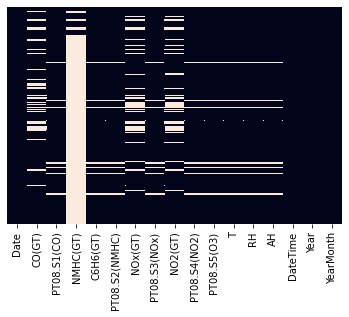

In [ ]:
data= data.replace(-200,np.nan)
print(data.head())
print(data.isnull().any())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
print(data.isnull().sum()/len(data))
data.drop(['NMHC(GT)'], axis= 1, inplace= True)
data.isnull().sum()


DATA Cleaning

In [ ]:
data['CO(GT)'] = data['CO(GT)'].fillna(method='ffill')
data['PT08.S1(CO)'] = data.groupby("Date")['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
data['C6H6(GT)'] = data.groupby("Date")['C6H6(GT)'].fillna(data['C6H6(GT)'].mean())
data['PT08.S2(NMHC)'] = data.groupby("Date")['PT08.S2(NMHC)'].fillna(data['PT08.S2(NMHC)'].mean())
data['NOx(GT)'] = data.groupby("Date")['NOx(GT)'].fillna(data['NOx(GT)'].mean())
data['PT08.S3(NOx)'] = data.groupby("Date")['PT08.S3(NOx)'].fillna(data['PT08.S3(NOx)'].mean())
data['NO2(GT)'] = data.groupby("Date")['NO2(GT)'].fillna(data['NO2(GT)'].mean())
data['PT08.S4(NO2)'] = data.groupby("Date")['PT08.S4(NO2)'].fillna(data['PT08.S4(NO2)'].mean())
data.isnull().sum()

Date               0
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)      366
T                366
RH               366
AH               366
DateTime           0
Year               0
YearMonth          0
dtype: int64

In [ ]:


data = data.fillna(method='ffill')
data.isnull().any()

Date             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
DateTime         False
Year             False
YearMonth        False
dtype: bool

In [ ]:
sns.pairplot(data)

In [ ]:
y = data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
x = data[indep_col]
utils.multiclass.type_of_target(y.iloc[:,0])
utils.multiclass.type_of_target(x.iloc[:,0])
#print(y)
ss = StandardScaler()
x_std = ss.fit_transform(x)

#Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
    #print (dfoutput)


# adfu(y.iloc[:,0])
# adfu(y.iloc[:,1])
# adfu(y.iloc[:,2])
# adfu(y.iloc[:,3])



In [ ]:
for i in range(y.shape[1]):
  output = adfu(y.iloc[:,i])
  print('p-value',output['p-value'])
  if output['p-value'] < 0.05:
    print("Rejecting H0 , Data is Stationary\n")

In [ ]:
for i in range(x.shape[1]):
  output = adfu(x.iloc[:,i])
  print('p-value',output['p-value'])
  if output['p-value'] < 0.05:
    print("Rejecting H0 , Data is Stationary\n")


In [ ]:
# from statsmodels.stats.stattools import durbin_watson

# #perform Durbin-Watson test
# durbin_watson(data[feature_columns])


#Regression Analysis

Linearity Test with plots

In [ ]:
for i in indep_col:
    sns.lmplot(x=i,y='CO(GT)',data=data)
    #plt.savefig(i+'.jpg')
for i in indep_col:
    sns.lmplot(x=i,y='C6H6(GT)',data=data)
    #plt.savefig(i+'AH'+'.jpg')
for i in indep_col:
    sns.lmplot(x=i,y='NOx(GT)', data=data)
for i in indep_col:
    sns.lmplot(x=i,y='NO2(GT)', data=data)

Normality test using Q-Q plots and Histograms

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
for i in feature_columns:
    #fitted_data ,lmbda= stats.yeojohnson(data[i])

    qqplot(data[i], line='s')
    plt.title(i)
    plt.savefig('normality'+i+'.jpg')

In [ ]:
from scipy import stats
for i in feature_columns:
    #fitted_data ,lmbda= stats.yeojohnson(data[i])
    sns.distplot(data[i])
    plt.figure()

Multicollinearity Check

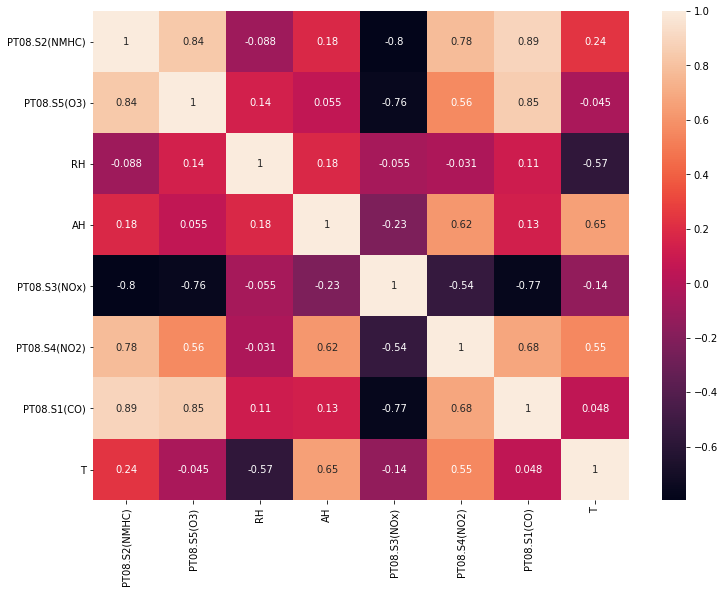

In [ ]:
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
plt.figure(figsize=(12,9))
sns.heatmap(data[indep_col].corr(),annot=True)
plt.savefig('Correlation'+i+'.jpg')


VIF test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data[feature_columns])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(X.columns)

Index(['const', 'PT08.S2(NMHC)', 'AH', 'PT08.S5(O3)', 'PT08.S1(CO)',
       'PT08.S3(NOx)', 'T', 'RH', 'PT08.S4(NO2)'],
      dtype='object')


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X = add_constant(data[['PT08.S5(O3)', 'RH', 'AH', 'PT08.S3(NOx)','PT08.S4(NO2)', 'PT08.S1(CO)']])
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(X.columns)

Index(['const', 'PT08.S5(O3)', 'RH', 'AH', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S1(CO)'],
      dtype='object')


In [ ]:
vif

[264.51765627767134,
 14.03649673496301,
 9.96032437661133,
 4.981303080145871,
 7.251828764662606,
 4.123031624386101,
 13.378508056355782,
 7.67720208197868,
 8.91573324973523]

In [ ]:
y = data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
x = data[indep_col]
utils.multiclass.type_of_target(y.iloc[:,0])
utils.multiclass.type_of_target(x.iloc[:,0])
print(y)

In [ ]:
# from scipy.stats import shapiro
# from scipy.stats import anderson
# from scipy.stats import normaltest

# # name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
# # test = sms.jarque_bera(model.resid)
# # lzip(name, test)

# for i in feature_columns:
 
#   stat, p = normaltest(data[i])
#   print(str(i)+'Statistics=%.3f, p=%.3f' % (stat, p))
#   # interpret
#   alpha = 0.05
#   if p > alpha:
#     print('looks Gaussian (fail to reject H0)')
#   else:
#     print('does not look Gaussian (reject H0)')

# Interpreting Regression Coefficients using Pvalue

In [ ]:
corr = x.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]
data_x = data[selected_columns]
x = x[selected_columns]

In [ ]:
x.shape

(9357, 8)

In [ ]:
# scaler = StandardScaler().fit(x)
# x_scaled = pd.DataFrame(scaler.transform(x), index=x.index.values, columns=x.columns.values)
# scaler = StandardScaler().fit(y)
# y_scaled = pd.DataFrame(scaler.transform(y), index=y.index.values, columns=y.columns.values)
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([0,1]).fit(x)
x_scaled = pd.DataFrame(scaler.transform(x), index=x.index.values, columns=x.columns.values)
# scaler = MinMaxScaler([0,1]).fit(y)
# y_scaled = pd.DataFrame(scaler.transform(y), index=y.index.values, columns=y.columns.values)
y_scaled= y.copy()

#Yeo-Johnson Tranformation

In [ ]:


y_2 = np.array(y_scaled.iloc[:,1])
y_2 = y_2.reshape((len(y_scaled),1))

y_3 = np.array(y_scaled.iloc[:,2])
y_3 = y_3.reshape((len(y_scaled),1))

y_4 = np.array(y_scaled.iloc[:,3])
y_4 = y_4.reshape((len(y_scaled),1))


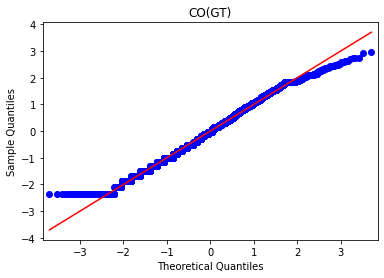

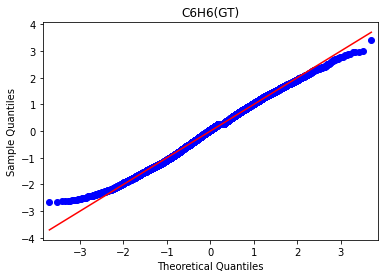

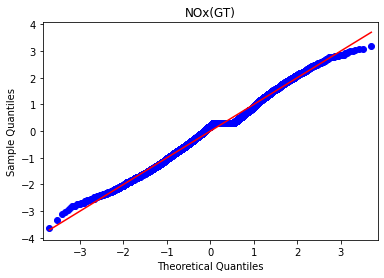

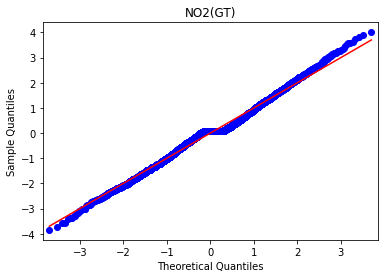

In [ ]:
#from scipy import stats
from sklearn.preprocessing import PowerTransformer
y_label = ['CO(GT)',   'C6H6(GT)',  'NOx(GT)',  'NO2(GT)']
pt1 = PowerTransformer(method='yeo-johnson')
y_scaled.iloc[:,0] = pt1.fit_transform(y_1)

pt2 = PowerTransformer(method='yeo-johnson')
y_scaled.iloc[:,1] = pt2.fit_transform(y_2)

pt3 = PowerTransformer(method='yeo-johnson')
y_scaled.iloc[:,2] = pt3.fit_transform(y_3)

pt4 = PowerTransformer(method='yeo-johnson')
y_scaled.iloc[:,3] = pt4.fit_transform(y_4)

#y_scaled.iloc[:,i],lamb = stats.yeojohnson(y_scaled.iloc[:,i])
#print(lamb)
for i in range(0,4):
  qqplot(y_scaled.iloc[:,i], line='s')
  plt.title(y_label[i])
  plt.savefig("q-q_plot_after_transform_"+str(y_label[i])+"jpg")

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=42)

In [ ]:
y_1 = np.array(y_train.iloc[:,0])
y_1 = y_1.reshape((len(y_train),1))

y_2 = np.array(y_train.iloc[:,1])
y_2 = y_2.reshape((len(y_train),1))

y_3 = np.array(y_train.iloc[:,2])
y_3 = y_3.reshape((len(y_train),1))

y_4 = np.array(y_train.iloc[:,3])
y_4 = y_4.reshape((len(y_train),1))

y_train_inverse = y_train.copy()
y_train_inverse.iloc[:,0] = pt1.inverse_transform(y_1)
y_train_inverse.iloc[:,1] = pt2.inverse_transform(y_2)
y_train_inverse.iloc[:,2] = pt3.inverse_transform(y_3)
y_train_inverse.iloc[:,3] = pt4.inverse_transform(y_4)


y_1_1 = np.array(y_test.iloc[:,0])
y_1_1 = y_1_1.reshape((len(y_test),1))

y_2_1 = np.array(y_test.iloc[:,1])
y_2_1 = y_2_1.reshape((len(y_test),1))

y_3_1 = np.array(y_test.iloc[:,2])
y_3_1 = y_3_1.reshape((len(y_test),1))

y_4_1 = np.array(y_test.iloc[:,3])
y_4_1 = y_4_1.reshape((len(y_test),1))

y_test_inverse = y_test.copy()
y_test_inverse.iloc[:,0] = pt1.inverse_transform(y_1_1)
y_test_inverse.iloc[:,1] = pt2.inverse_transform(y_2_1)
y_test_inverse.iloc[:,2] = pt3.inverse_transform(y_3_1)
y_test_inverse.iloc[:,3] = pt4.inverse_transform(y_4_1)


OLS Results after tranformation

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=42)
from sklearn.metrics import mean_squared_error
x2_1 = sm.add_constant(x_train)
est_CO = sm.OLS(y_train.iloc[:,0],x2_1)
est2_CO = est_CO.fit()

y_pred = est2_CO.predict(x2_1) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt1.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,0],y_pred[:,0])
print(est2_CO.summary())
print("Train MSE = ",res)


y_pred_t = est2_CO.predict(sm.add_constant(x_test)) 
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,0],y_pred_t[:,0])
print("Test MSE = ",res)


x2_2 = sm.add_constant(x_train)
est_C6 = sm.OLS(y_train.iloc[:,1],x2_2)
est2_C6 = est_C6.fit()
y_pred = est2_C6.predict(x2_2) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt2.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,1],y_pred[:,0])
print(est2_C6.summary())
print("Train MSE = ",res)


y_pred_t = est2_C6.predict(sm.add_constant(x_test)) 
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt2.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,1],y_pred_t[:,0])
print("Test MSE = ",res)

x2_3 = sm.add_constant(x_train)
est_NOx = sm.OLS(y_train.iloc[:,2],x2_3)
est2_NOx = est_NOx.fit()
y_pred = est2_NOx.predict(x2_3) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt3.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,2],y_pred[:,0])
print(est2_NOx.summary())
print("Train MSE = ",res)

y_pred_t = est2_NOx.predict(sm.add_constant(x_test)) 
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt3.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,2],y_pred_t[:,0])
print("Test MSE = ",res)

x2_4 = sm.add_constant(x_train)
est_NO2 = sm.OLS(y_train.iloc[:,3],x2_4)
est2_NO2 = est_NO2.fit()
y_pred = est2_NO2.predict(x2_4) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt4.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,3],y_pred[:,0])
print(est2_NO2.summary())
print("Train MSE = ",res)

y_pred_t = est2_NO2.predict(sm.add_constant(x_test)) 
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt4.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,3],y_pred_t[:,0])
print("Test MSE = ",res)



                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1912.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:09:52   Log-Likelihood:                -7580.9
No. Observations:                8421   AIC:                         1.518e+04
Df Residuals:                    8412   BIC:                         1.524e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4918      0.076    -19.518


After removing Features

In [ ]:


x2_1 = sm.add_constant(x_train)
#x2_1 = x_train.copy()
#x2_1.drop(['PT08.S3(NOx)'],axis= 1, inplace= True)
est_CO = sm.OLS(y_train.iloc[:,0],x2_1)
est2_CO = est_CO.fit()
y_pred = est2_CO.predict(x2_1) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt1.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,0],y_pred[:,0])
print(est2_CO.summary())
print("Train MSE = ",res)

x2_1_test = sm.add_constant(x_test)
#x2_1_test.drop(['PT08.S3(NOx)'],axis= 1, inplace= True)
y_pred_t = est2_CO.predict(x2_1_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,0],y_pred_t[:,0])
print("Test MSE = ",res)




x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
x2_2.drop(['RH'],axis= 1, inplace= True)
est_C6 = sm.OLS(y_train.iloc[:,1],x2_2)
est2_C6 = est_C6.fit()
y_pred = est2_C6.predict(x2_2) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt2.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,1],y_pred[:,0])
print(est2_C6.summary())
print("Train MSE = ",res)

x2_2_test = sm.add_constant(x_test)
x2_2_test.drop(['RH'],axis= 1, inplace= True)
y_pred_t = est2_C6.predict(x2_2_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt2.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,1],y_pred_t[:,0])
print("Test MSE = ",res)


x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
#x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
x2_3.drop(['T','AH','PT08.S1(CO)'],axis= 1, inplace= True)
est_NOx = sm.OLS(y_train.iloc[:,2],x2_3)
est2_NOx = est_NOx.fit()
y_pred = est2_NOx.predict(x2_3) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt3.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,2],y_pred[:,0])
print(est2_NOx.summary())
print("Train MSE = ",res)


x2_3_test = sm.add_constant(x_test)
x2_3_test.drop(['T','AH','PT08.S1(CO)'],axis= 1, inplace= True)
y_pred_t = est2_NOx.predict(x2_3_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt3.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,2],y_pred_t[:,0])
print("Test MSE = ",res)


x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
x2_4.drop(['T'],axis= 1, inplace= True)
est_NO2 = sm.OLS(y_train.iloc[:,3],x2_4)
est2_NO2 = est_NO2.fit()
y_pred = est2_NO2.predict(x2_4) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt4.inverse_transform(y_pred)

res = mean_squared_error(y_train_inverse.iloc[:,3],y_pred[:,0])
print(est2_NO2.summary())
print("Train MSE = ",res)

x2_4_test = sm.add_constant(x_test)
x2_4_test.drop(['T'],axis= 1, inplace= True)
y_pred_t = est2_NO2.predict(x2_4_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt4.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,3],y_pred_t[:,0])
print("Test MSE = ",res)



                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1912.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:25:11   Log-Likelihood:                -7580.9
No. Observations:                8421   AIC:                         1.518e+04
Df Residuals:                    8412   BIC:                         1.524e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4918      0.076    -19.518

Normality Test for residuals and residual plots 

In [ ]:

mod = sm.QuantReg(y_train_NO2.iloc[:] , x2_4)
res = mod.fit(q=0.5)
print(res.summary())
y_train_pred1 = res.predict(x2_4)
resid1 = (y_train_NO2.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

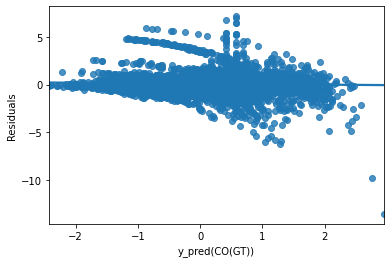

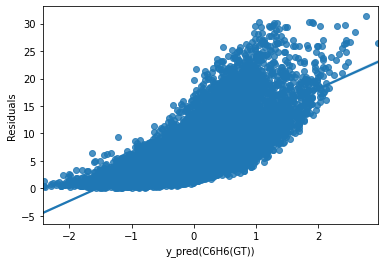

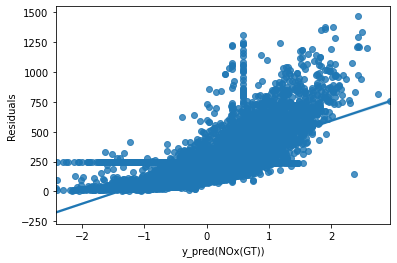

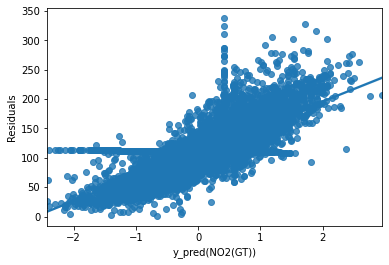

In [ ]:
#x3 = sm.add_constant(x_train)
# x2_1 = sm.add_constant(x_train)
# #x2_1 = x_train.copy()
# x2_1.drop(['PT08.S3(NOx)'],axis= 1, inplace= True)
#y_train_pred1 = est2_CO.predict(x2_1)
y_pred_t = est2_CO.predict(x2_1)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
resid1 = (y_train_inverse.iloc[:,0] - y_pred_t[:,0])
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO_trans'+'.jpg')

#x3 = sm.add_constant(x_train)
# x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
#x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
y_pred_t = est2_C6.predict(x2_2)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
resid2 = (y_train_inverse.iloc[:,1] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,1] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid2)
plt.xlabel("y_pred(C6H6(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_C6_trans'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
#x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
#x2_3.drop(['AH','T','PT08.S1(CO)'],axis= 1, inplace= True)
y_pred_t = est2_NOx.predict(x2_3)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
resid3 = (y_train_inverse.iloc[:,2] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,2] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid3)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NOx_trans'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
#x2_4.drop(['T'],axis= 1, inplace= True)
y_pred_t = est2_NO2.predict(x2_4)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
resid4 = (y_train_inverse.iloc[:,3] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,3] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid4)
plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NO2_trans'+'.jpg')

<Figure size 432x288 with 0 Axes>

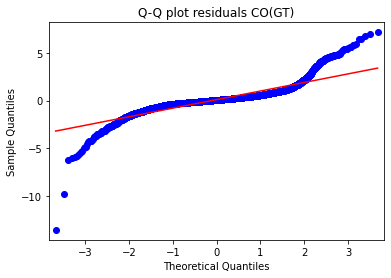

<Figure size 432x288 with 0 Axes>

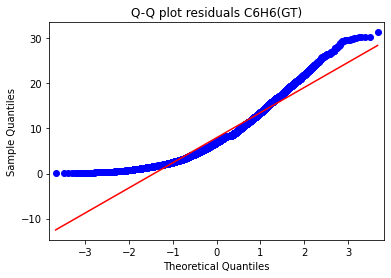

<Figure size 432x288 with 0 Axes>

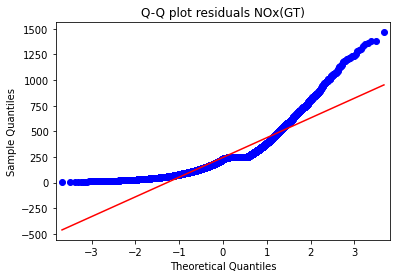

<Figure size 432x288 with 0 Axes>

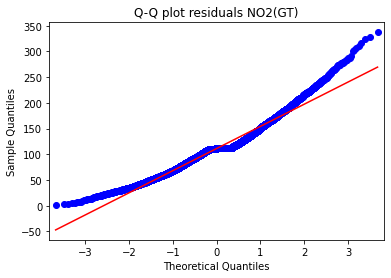

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(resid1, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Residual_Q_Q_CO_1T.jpg')

plt.figure()
qqplot(resid2, line='s')
plt.title("Q-Q plot residuals C6H6(GT)")
plt.savefig('Residual_Q_Q_C6H6_1T.jpg')

plt.figure()
qqplot(resid3, line='s')
plt.title("Q-Q plot residuals NOx(GT)")
plt.savefig('Residual_Q_Q_NOx_1T.jpg')

plt.figure()
qqplot(resid4, line='s')
plt.title("Q-Q plot residuals NO2(GT)")
plt.savefig('Residual_Q_Q_NO2_1T.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

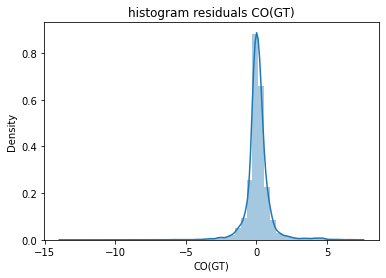

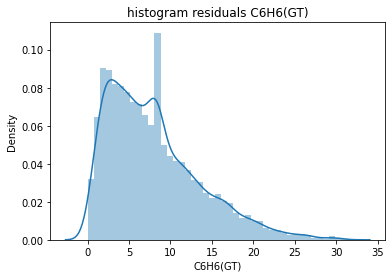

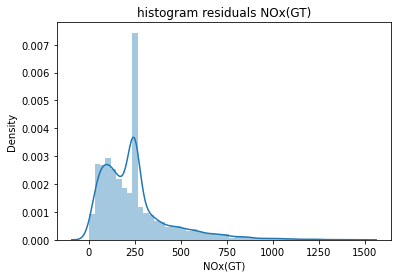

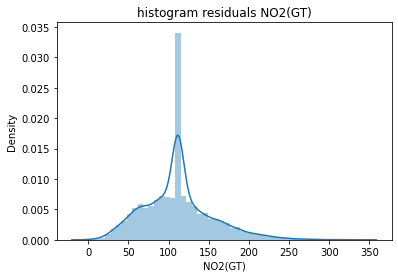

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(resid1)
plt.title("histogram residuals CO(GT)")
plt.savefig('hist_plot_residual_CO_1T.jpg')

plt.figure()
sns.distplot(resid2)
plt.title("histogram residuals C6H6(GT)")
plt.savefig('hist_plot_residual_C6H6_1T.jpg')


plt.figure()
sns.distplot(resid3)
plt.title("histogram residuals NOx(GT)")
plt.savefig('hist_plot_residual_NOx_1T.jpg')


plt.figure()
sns.distplot(resid4)
plt.title("histogram residuals NO2(GT)")
plt.savefig('hist_plot_residual_NO2_1T.jpg')



In [ ]:
sm.graphics.influence_plot(est2_CO)

#Outliers Removal CO

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


(133,)

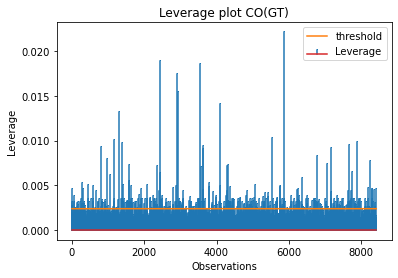

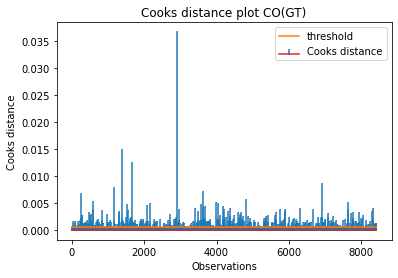

In [ ]:
influence = est2_CO.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_CO.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot CO(GT)')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_CO.jpg')

(c, p) = influence.cooks_distance
temp =(4*np.mean(c))
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),temp*np.ones(len(c)))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot CO(GT)')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_CO.jpg')

out_lev = np.where(c1>2*(est2_CO.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape



In [ ]:
x2_1.iloc[final_out,:]  =None
y_train_CO = y_train.iloc[:,0]
y_train_CO_inv = y_train_inverse.iloc[:,0]
y_train_CO.iloc[final_out]  =None
y_train_CO_inv.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_1.isnull().sum()
x2_1 = x2_1.dropna(axis=0)
#x2_1.isnull().sum()
y_train_CO.isnull().sum()
y_train_CO = y_train_CO.dropna(axis=0)
y_train_CO_inv.isnull().sum()
y_train_CO_inv = y_train_CO_inv.dropna(axis=0)

est_CO_mod = sm.OLS(y_train_CO.iloc[:],x2_1)
est2_CO_mod = est_CO_mod.fit()
y_pred = est2_CO_mod.predict(x2_1) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt1.inverse_transform(y_pred)

res = mean_squared_error(y_train_CO_inv.iloc[:],y_pred[:,0])
print(est2_CO.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

y_pred_t = est2_CO_mod.predict(x2_1_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,0],y_pred_t[:,0])
print("Test MSE = ",res)

# res = mean_squared_error(y_test.iloc[:,0],y_pred)
# print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1912.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:48:15   Log-Likelihood:                -7580.9
No. Observations:                8421   AIC:                         1.518e+04
Df Residuals:                    8412   BIC:                         1.524e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4918      0.076    -19.518

#Outliers removal C6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(183,)

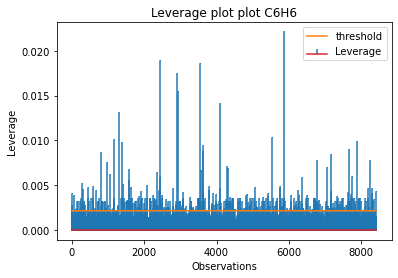

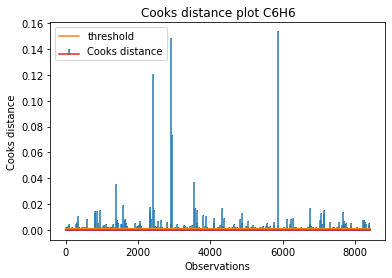

In [ ]:
influence = est2_C6.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_C6.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot C6H6')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_C6H6.jpg')

(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot C6H6')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_C6H6.jpg')

out_lev = np.where(c1>2*(est2_C6.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:
x2_2.iloc[final_out,:]  =None
y_train_C6 = y_train.iloc[:,1]
y_train_C6_inv = y_train_inverse.iloc[:,1]
y_train_C6.iloc[final_out]  =None
y_train_C6_inv.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_2.isnull().sum()
x2_2 = x2_2.dropna(axis=0)
#x2_1.isnull().sum()
y_train_C6.isnull().sum()
y_train_C6 = y_train_C6.dropna(axis=0)
y_train_C6_inv.isnull().sum()
y_train_C6_inv = y_train_C6_inv.dropna(axis=0)
#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)
est_C6_mod = sm.OLS(y_train_C6.iloc[:],x2_2)
est2_C6_mod = est_C6_mod.fit()
y_pred = est2_C6_mod.predict(x2_2) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt2.inverse_transform(y_pred)

res = mean_squared_error(y_train_C6_inv.iloc[:],y_pred[:,0])
print(est2_C6.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

y_pred_t = est2_C6_mod.predict(x2_2_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt2.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,1],y_pred_t[:,0])
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 6.963e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:50:18   Log-Likelihood:                 5237.8
No. Observations:                8421   AIC:                        -1.046e+04
Df Residuals:                    8413   BIC:                        -1.040e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6478      0.012   -135.468

#Outlier Removal Nox

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(148,)

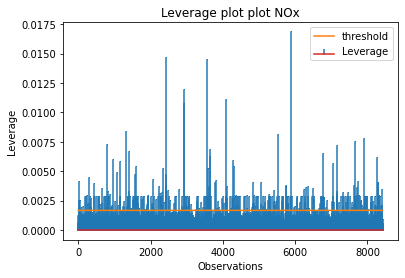

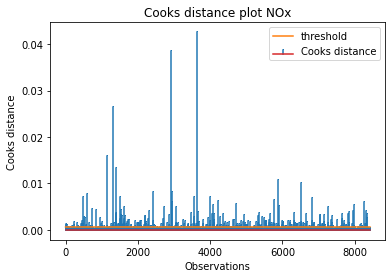

In [ ]:
influence = est2_NOx.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_NOx.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot NOx')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_NOx.jpg')

(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot NOx')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_NOx.jpg')


out_lev = np.where(c1>2*(est2_NOx.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:
x2_3.iloc[final_out,:]  =None
y_train_NOx = y_train.iloc[:,2]
y_train_NOx_inv = y_train_inverse.iloc[:,2]
y_train_NOx.iloc[final_out]  =None
y_train_NOx_inv.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_3.isnull().sum()
x2_3 = x2_3.dropna(axis=0)
#x2_1.isnull().sum()
y_train_NOx.isnull().sum()
y_train_NOx = y_train_NOx.dropna(axis=0)
y_train_NOx_inv.isnull().sum()
y_train_NOx_inv = y_train_NOx_inv.dropna(axis=0)
#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)

est_NOx_mod = sm.OLS(y_train_NOx.iloc[:],x2_3)
est2_NOx_mod = est_NOx_mod.fit()
y_pred = est2_NOx_mod.predict(x2_3) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt3.inverse_transform(y_pred)

res = mean_squared_error(y_train_NOx_inv.iloc[:],y_pred[:,0])
print(est2_NOx.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

y_pred_t = est2_NOx_mod.predict(x2_3_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt3.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,2],y_pred_t[:,0])
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                NOx(GT)   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3439.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:51:02   Log-Likelihood:                -7257.4
No. Observations:                8421   AIC:                         1.453e+04
Df Residuals:                    8415   BIC:                         1.457e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7045      0.048    -14.640

#Outliers removal NO2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


(132,)

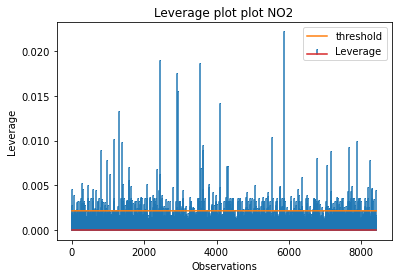

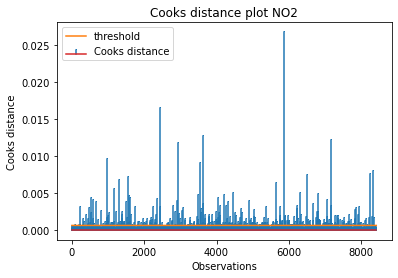

In [ ]:
influence = est2_NO2.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_NO2.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot NO2')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_NO2.jpg')


(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot NO2')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_NO2.jpg')


out_lev = np.where(c1>2*(est2_NO2.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:
x2_4.iloc[final_out,:]  =None
y_train_NO2 = y_train.iloc[:,3]
y_train_NO2_inv = y_train.iloc[:,3]
y_train_NO2.iloc[final_out]  =None
y_train_NO2_inv.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_4.isnull().sum()
x2_4 = x2_4.dropna(axis=0)
#x2_1.isnull().sum()
y_train_NO2.isnull().sum()
y_train_NO2 = y_train_NO2.dropna(axis=0)
y_train_NO2_inv.isnull().sum()
y_train_NO2_inv = y_train_NO2_inv.dropna(axis=0)

#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)
est_NO2_mod = sm.OLS(y_train_NO2.iloc[:],x2_4)
est2_NO2_mod = est_NO2_mod.fit()
y_pred = est2_NO2_mod.predict(x2_4) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt4.inverse_transform(y_pred)

res = mean_squared_error(y_train_NO2_inv.iloc[:],y_pred[:,0])
print(est2_NO2.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

y_pred_t = est2_NO2_mod.predict(x2_4_test)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt4.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,3],y_pred_t[:,0])
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                NO2(GT)   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1829.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:51:45   Log-Likelihood:                -8048.8
No. Observations:                8421   AIC:                         1.611e+04
Df Residuals:                    8413   BIC:                         1.617e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9047      0.059     15.321

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

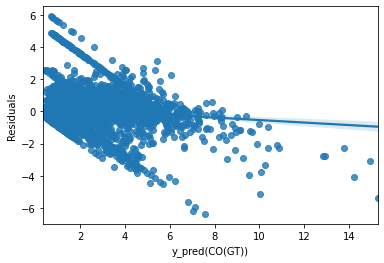

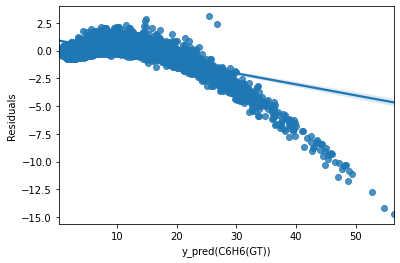

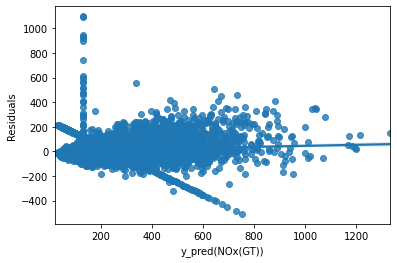

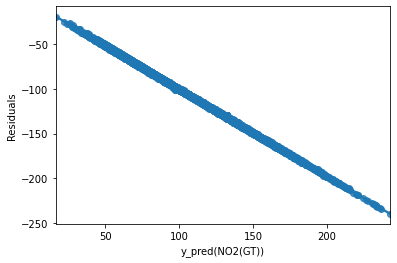

In [ ]:
#x2_1 = sm.add_constant(x_train)
#x2_1 = x_train.copy()
#x2_1.drop(['RH'],axis= 1, inplace= True)

#x3 = sm.add_constant(x_train)
# x2_1 = sm.add_constant(x_train)
# #x2_1 = x_train.copy()
# x2_1.drop(['PT08.S3(NOx)'],axis= 1, inplace= True)
#y_train_pred1 = est2_CO.predict(x2_1)
y_pred_t = est2_CO_mod.predict(x2_1)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
resid1 = (y_train_CO_inv.iloc[:] - y_pred_t[:,0])
plt.figure()
sns.regplot(y_pred_t,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO_out'+'.jpg')

#x3 = sm.add_constant(x_train)
# x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
#x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
y_pred_t = est2_C6_mod.predict(x2_2)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt2.inverse_transform(y_pred_t)
resid2 = (y_train_C6_inv.iloc[:] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,1] - y_train_pred1)
plt.figure()
sns.regplot(y_pred_t,resid2)
plt.xlabel("y_pred(C6H6(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_C6_out'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
#x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
#x2_3.drop(['AH','T','PT08.S1(CO)'],axis= 1, inplace= True)
y_pred_t = est2_NOx_mod.predict(x2_3)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt3.inverse_transform(y_pred_t)
resid3 = (y_train_NOx_inv.iloc[:] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,2] - y_train_pred1)
plt.figure()
sns.regplot(y_pred_t,resid3)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NOx_out'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
#x2_4.drop(['T'],axis= 1, inplace= True)
y_pred_t = est2_NO2_mod.predict(x2_4)
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt4.inverse_transform(y_pred_t)
resid4 = (y_train_NO2_inv.iloc[:] - y_pred_t[:,0])
#resid1 = (y_train.iloc[:,3] - y_train_pred1)
plt.figure()
sns.regplot(y_pred_t,resid4)
plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NO2_out'+'.jpg')







# y_train_pred1 = est2_CO_mod.predict(x2_1)
# resid1 = (y_train_CO.iloc[:] - y_train_pred1)
# plt.figure()
# sns.regplot(y_train_pred1,resid1)
# plt.xlabel("y_pred(CO(GT))")
# plt.ylabel("Residuals")
# plt.savefig('Hetero_CO_outliers'+'.jpg')

# #x3 = sm.add_constant(x_train)
# #x2_2 = sm.add_constant(x_train)
# #x2_2 = x_train.copy()
# #x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
# y_train_pred1 = est2_C6_mod.predict(x2_2)
# resid1 = (y_train_C6.iloc[:] - y_train_pred1)
# plt.figure()
# sns.regplot(y_train_pred1,resid1)
# plt.xlabel("y_pred(C6H6(GT))")
# plt.ylabel("Residuals")
# plt.savefig('Hetero_C6_outliers'+'.jpg')

# #x3 = sm.add_constant(x_train)
# #x2_3 = sm.add_constant(x_train)
# #x2_3 = x_train.copy()
# #x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
# y_train_pred1 = est2_NOx_mod.predict(x2_3)
# resid1 = (y_train_NOx.iloc[:] - y_train_pred1)
# plt.figure()
# sns.regplot(y_train_pred1,resid1)
# plt.xlabel("y_pred(NOx(GT))")
# plt.ylabel("Residuals")
# plt.savefig('Hetero_NOx_outliers'+'.jpg')

# #x3 = sm.add_constant(x_train)
# #x2_4 = sm.add_constant(x_train)
# #x2_4 = x_train.copy()
# #x2_4.drop(['T'],axis= 1, inplace= True)
# y_train_pred1 = est2_NO2_mod.predict(x2_4)
# resid1 = (y_train_NO2.iloc[:] - y_train_pred1)
# plt.figure()
# sns.regplot(y_train_pred1,resid1)
# plt.xlabel("y_pred(NO2(GT))")
# plt.ylabel("Residuals")
# plt.savefig('Hetero_NO2_outliers'+'.jpg')

<Figure size 432x288 with 0 Axes>

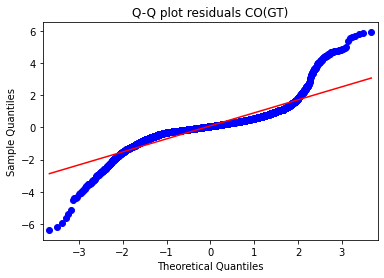

<Figure size 432x288 with 0 Axes>

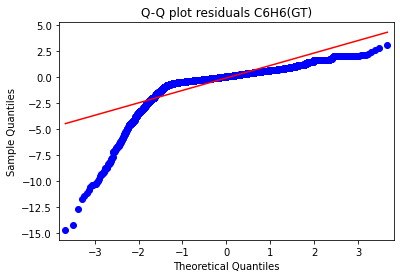

<Figure size 432x288 with 0 Axes>

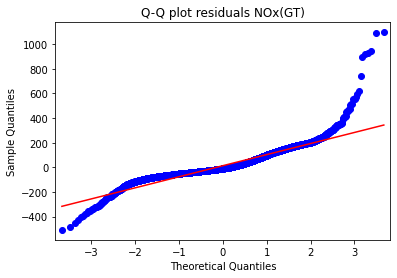

<Figure size 432x288 with 0 Axes>

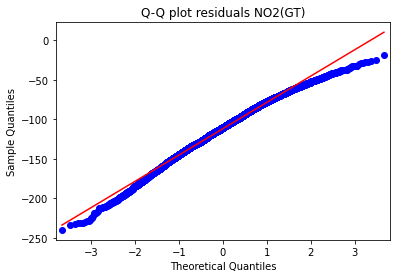

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(resid1, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Residual_Q_Q_CO_outliers.jpg')

plt.figure()
qqplot(resid2, line='s')
plt.title("Q-Q plot residuals C6H6(GT)")
plt.savefig('Residual_Q_Q_C6H6_outliers.jpg')

plt.figure()
qqplot(resid3, line='s')
plt.title("Q-Q plot residuals NOx(GT)")
plt.savefig('Residual_Q_Q_NOx_outliers.jpg')

plt.figure()
qqplot(resid4, line='s')
plt.title("Q-Q plot residuals NO2(GT)")
plt.savefig('Residual_Q_Q_NO2_outliers.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

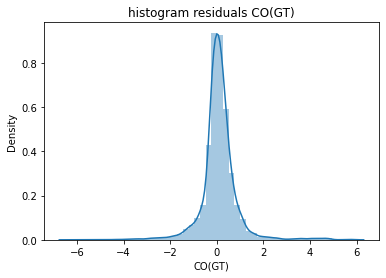

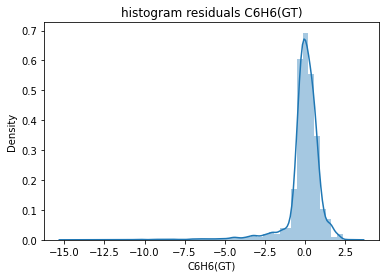

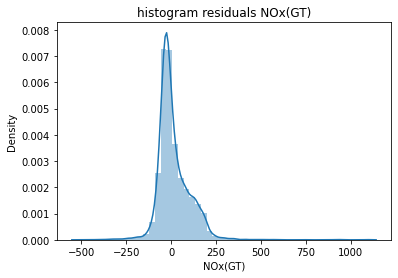

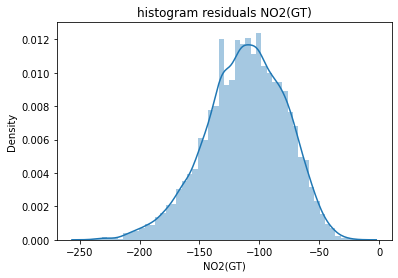

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(resid1)
plt.title("histogram residuals CO(GT)")
plt.savefig('hist_plot_residual_CO_outliers.jpg')

plt.figure()
sns.distplot(resid2)
plt.title("histogram residuals C6H6(GT)")
plt.savefig('hist_plot_residual_C6H6_outliers.jpg')

plt.figure()
sns.distplot(resid3)
plt.title("histogram residuals NOx(GT)")
plt.savefig('hist_plot_residual_NOx_outliers.jpg')

plt.figure()
sns.distplot(resid4)
plt.title("histogram residuals NO2(GT)")
plt.savefig('hist_plot_residual_NO2_outliers.jpg')



In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
white_test = het_white(est2.resid, est2.model.exog)
#bp_test = het_breuschpagan(est2.resid, est2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
#print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))


{'LM Statistic': 1644.848979347886, 'LM-Test p-value': 0.0, 'F-Statistic': 49.57811952951766, 'F-Test p-value': 0.0}


#Bartlett_Sphericity Test and PCA

In [ ]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 3.3MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=80c1bbf9a37317eea96389809e8af59387b2c50a9486668ed8111234d4311ce0
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
# from sklearn.decomposition import FactorAnalysis
# FA = FactorAnalysis(n_components = 3).fit_transform(x.values)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x2_4.iloc[:,1:])
print(chi_square_value,p_value)

58594.539570906345 0.0


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x2_1.iloc[:,1:])
print(kmo_model)

0.667382065712677


/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
stats.bartlett(x2_2.iloc[:,0],x2_2.iloc[:,1],x2_2.iloc[:,2],x2_2.iloc[:,3],x2_2.iloc[:,4],x2_2.iloc[:,5],x2_2.iloc[:,6],x2_2.iloc[:,7])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2241: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


BartlettResult(statistic=inf, pvalue=0.0)

#PCA

#PCA CO

Explained Variance 95: [0.42593322 0.30554684 0.21039338 0.02480369]
4
Explained Variance 99: [0.42593322 0.30554684 0.21039338 0.02480369 0.01408404 0.00954625]
6
                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3825.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:23:23   Log-Likelihood:                -7348.0
No. Observations:                8288   AIC:                         1.471e+04
Df Residuals:                    8283   BIC:                         1.474e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


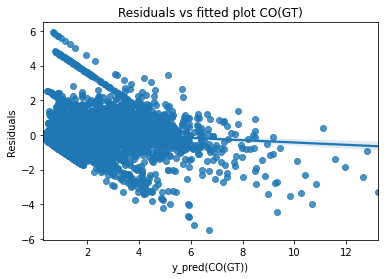

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)
fit_95 = pca_95.fit(x2_1.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_1.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_CO_95 = pca_95.fit_transform(x2_1.iloc[:,1:])
x_PCA_CO_99 = pca_99.fit_transform(x2_1.iloc[:,1:])



est_CO_mod_PCA = sm.OLS(y_train_CO.iloc[:],sm.add_constant(x_PCA_CO_95))
est2_CO_mod_PCA = est_CO_mod_PCA.fit()
print(est2_CO_mod_PCA.summary())

y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt1.inverse_transform(y_pred)

res = mean_squared_error(y_train_CO_inv.iloc[:],y_pred[:,0])
#print(est2_CO.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
y_pred_t = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt1.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,0],y_pred_t[:,0])
print("Test MSE = ",res)



# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

# x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
# res = mean_squared_error(y_test.iloc[:,0],y_pred)
# print("Test MSE = ",res)

#y_train_pred1 = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt1.inverse_transform(y_pred)

resid1 = (y_train_CO_inv.iloc[:] - y_pred[:,0])
plt.figure()
sns.regplot(y_pred,resid1)
plt.title("Residuals vs fitted plot CO(GT)")
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO_PCA'+'.jpg')

#PCA C6

Explained Variance 95: [0.52614348 0.33258324 0.07693489 0.03022124]
4
Explained Variance 99: [0.52614348 0.33258324 0.07693489 0.03022124 0.0184907  0.01172828]
6
                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 3.327e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:24:47   Log-Likelihood:                 220.43
No. Observations:                8238   AIC:                            -430.9
Df Residuals:                    8233   BIC:                            -395.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


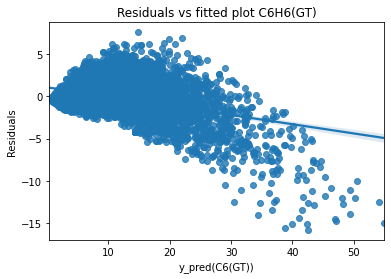

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)
fit_95 = pca_95.fit(x2_2.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_2.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_C6_95 = pca_95.fit_transform(x2_2.iloc[:,1:])
x_PCA_C6_99 = pca_99.fit_transform(x2_2.iloc[:,1:])


est_C6_mod_PCA = sm.OLS(y_train_C6.iloc[:],sm.add_constant(x_PCA_C6_95))
est2_C6_mod_PCA = est_C6_mod_PCA.fit()
print(est2_C6_mod_PCA.summary())

y_pred = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt2.inverse_transform(y_pred)

res = mean_squared_error(y_train_C6_inv.iloc[:],y_pred[:,0])
#print(est2_CO.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

x_PCA_C6_95_test = pca_95.transform(x2_2_test.iloc[:,1:])
y_pred_t = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95_test))
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt2.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,1],y_pred_t[:,0])
print("Test MSE = ",res)



# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

# x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
# res = mean_squared_error(y_test.iloc[:,0],y_pred)
# print("Test MSE = ",res)

#y_train_pred1 = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
y_pred = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt2.inverse_transform(y_pred)

resid2 = (y_train_C6_inv.iloc[:] - y_pred[:,0])
plt.figure()
sns.regplot(y_pred,resid2)
plt.xlabel("y_pred(C6(GT))")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted plot C6H6(GT)")
plt.savefig('Hetero_C6_PCA'+'.jpg')

#PCA NOx

Explained Variance 95: [0.50785695 0.3713575  0.08637563]
3
Explained Variance 99: [0.50785695 0.3713575  0.08637563 0.02438746 0.01002247]
5
                            OLS Regression Results                            
Dep. Variable:                NOx(GT)   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4573.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:30:34   Log-Likelihood:                -7509.0
No. Observations:                8273   AIC:                         1.503e+04
Df Residuals:                    8269   BIC:                         1.505e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


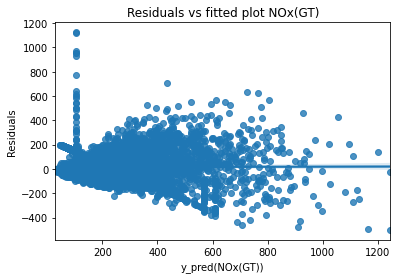

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)
fit_95 = pca_95.fit(x2_3.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_3.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_NOx_95 = pca_95.fit_transform(x2_3.iloc[:,1:])
x_PCA_NOx_99 = pca_99.fit_transform(x2_3.iloc[:,1:])
est_NOx_mod_PCA = sm.OLS(y_train_NOx.iloc[:],sm.add_constant(x_PCA_NOx_95))
est2_NOx_mod_PCA = est_NOx_mod_PCA.fit()
print(est2_NOx_mod_PCA.summary())

y_pred = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt3.inverse_transform(y_pred)

res = mean_squared_error(y_train_NOx_inv.iloc[:],y_pred[:,0])
#print(est2_CO.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

x_PCA_NOx_95_test = pca_95.transform(x2_3_test.iloc[:,1:])
y_pred_t = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95_test))
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt3.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,2],y_pred_t[:,0])
print("Test MSE = ",res)



# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

# x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
# res = mean_squared_error(y_test.iloc[:,0],y_pred)
# print("Test MSE = ",res)

#y_train_pred1 = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
y_pred = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt3.inverse_transform(y_pred)

resid3 = (y_train_NOx_inv.iloc[:] - y_pred[:,0])
plt.figure()
sns.regplot(y_pred,resid3)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted plot NOx(GT)")
plt.savefig('Hetero_NOx_PCA'+'.jpg')


#PCA NO2

Explained Variance 95: [0.47118529 0.26249819 0.20605122 0.02837767]
4
Explained Variance 99: [0.47118529 0.26249819 0.20605122 0.02837767 0.01728199 0.01082815]
6
                            OLS Regression Results                            
Dep. Variable:                NO2(GT)   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3069.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:37:19   Log-Likelihood:                -7921.4
No. Observations:                8289   AIC:                         1.585e+04
Df Residuals:                    8284   BIC:                         1.589e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


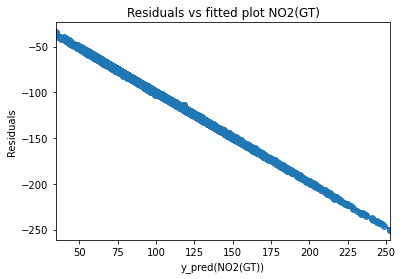

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)
fit_95 = pca_95.fit(x2_4.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_4.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_NO2_95 = pca_95.fit_transform(x2_4.iloc[:,1:])
x_PCA_NO2_99 = pca_99.fit_transform(x2_4.iloc[:,1:])
est_NO2_mod_PCA = sm.OLS(y_train_NO2.iloc[:],sm.add_constant(x_PCA_NO2_95))
est2_NO2_mod_PCA = est_NO2_mod_PCA.fit()
print(est2_NO2_mod_PCA.summary())

y_pred = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt4.inverse_transform(y_pred)

res = mean_squared_error(y_train_NO2_inv.iloc[:],y_pred[:,0])
#print(est2_CO.summary())
print("Train MSE = ",res)
# print(est2_CO_mod.summary())
# y_pred = est2_CO_mod.predict(x2_1)
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

x_PCA_NO2_95_test = pca_95.transform(x2_4_test.iloc[:,1:])
y_pred_t = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95_test))
y_pred_t = np.array(y_pred_t)
y_pred_t = y_pred_t.reshape((len(y_pred_t),1))
y_pred_t = pt4.inverse_transform(y_pred_t)
res = mean_squared_error(y_test_inverse.iloc[:,3],y_pred_t[:,0])
print("Test MSE = ",res)



# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
# res = mean_squared_error(y_train_CO.iloc[:],y_pred)
# print("Train MSE = ",res)

# x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
# y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
# res = mean_squared_error(y_test.iloc[:,0],y_pred)
# print("Test MSE = ",res)

#y_train_pred1 = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
y_pred = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95)) 
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))
y_pred = pt4.inverse_transform(y_pred)

resid4 = (y_train_NO2_inv.iloc[:] - y_pred[:,0])
plt.figure()
sns.regplot(y_pred,resid4)


plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted plot NO2(GT)")
plt.savefig('Hetero_NO2_PCA'+'.jpg')


In [ ]:
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import het_white
# white_test = het_breuschpagan(est2_NO2_mod_PCA.resid, est2_NO2_mod_PCA.model.exog)
# #bp_test = het_breuschpagan(est2.resid, est2.model.exog)
# labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
# #print(dict(zip(labels, bp_test)))
# print(dict(zip(labels, white_test)))

{'LM Statistic': 316.45344194687425, 'LM-Test p-value': 3.0550909461886634e-67, 'F-Statistic': 82.20204549134552, 'F-Test p-value': 1.519636512528547e-68}


Residual Plots

<Figure size 432x288 with 0 Axes>

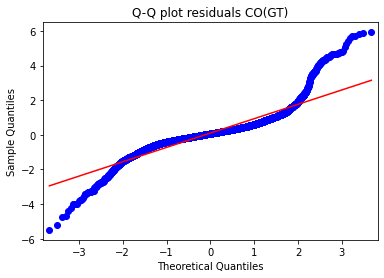

<Figure size 432x288 with 0 Axes>

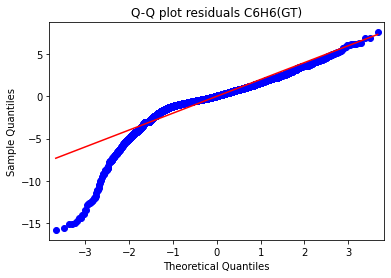

<Figure size 432x288 with 0 Axes>

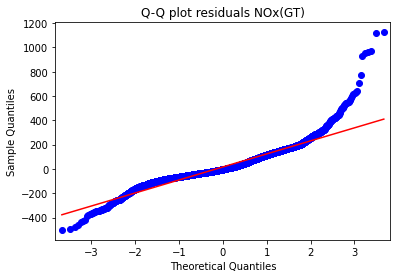

<Figure size 432x288 with 0 Axes>

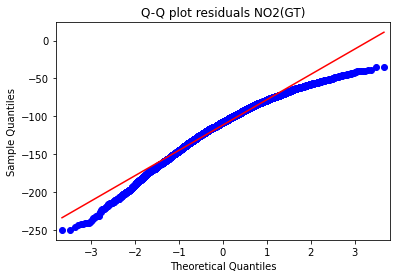

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(resid1, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Residual_Q_Q_CO_PCA.jpg')

plt.figure()
qqplot(resid2, line='s')
plt.title("Q-Q plot residuals C6H6(GT)")
plt.savefig('Residual_Q_Q_C6H6_PCA.jpg')

plt.figure()
qqplot(resid3, line='s')
plt.title("Q-Q plot residuals NOx(GT)")
plt.savefig('Residual_Q_Q_NOx_PCA.jpg')

plt.figure()
qqplot(resid4, line='s')
plt.title("Q-Q plot residuals NO2(GT)")
plt.savefig('Residual_Q_Q_NO2_PCA.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

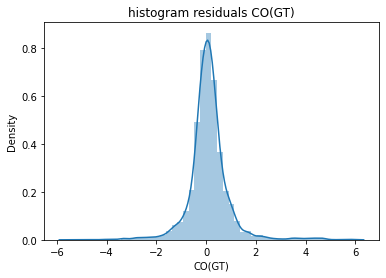

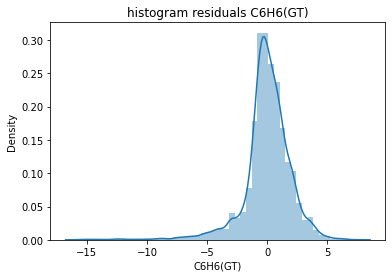

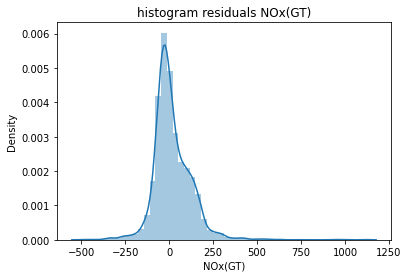

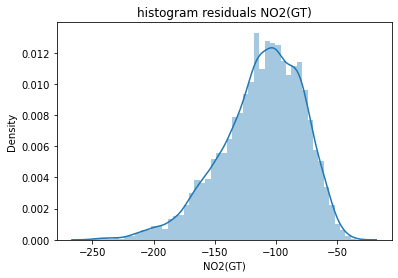

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(resid1)
plt.title("histogram residuals CO(GT)")
plt.savefig('hist_plot_residual_CO_PCA.jpg')

plt.figure()
sns.distplot(resid2)
plt.title("histogram residuals C6H6(GT)")
plt.savefig('hist_plot_residual_C6H6_PCA.jpg')


plt.figure()
sns.distplot(resid3)
plt.title("histogram residuals NOx(GT)")
plt.savefig('hist_plot_residual_NOx_PCA.jpg')


plt.figure()
sns.distplot(resid4)
plt.title("histogram residuals NO2(GT)")
plt.savefig('hist_plot_residual_NO2_PCA.jpg')

